In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Log:
    def __init__(self) -> None:
        self.w = list()
        self.iter = 0
    def add(self, w):
        self.w.append(w)
        self.iter += 1
    def get(self):
        return self.w

In [8]:

def predict(w, X):
    '''
    Predicts the labels of the data points in X using the weights w.
    X: a 2D numpy array of shape (n, d) where each row is a data point.
    w: a 1D numpy array of shape (d,).
    '''
    return np.sign(X.dot(w))

def perceptron(X, y, w_init, log: Log(), learning_rate = 0.1):
    w = w_init
    while True:
        if log is not None:
            log.add(w)
        pred = predict(w, X)
        mis_idx = np.where(np.equal(pred, y) == False)[0]
        num_mis = mis_idx.shape[0]
        if num_mis == 0:
            if log is not None:
                log.add(w)
            return w
        random_id = np.random.choice(mis_idx, 1) [0]
        w = w + learning_rate * y[random_id] * X[random_id]
        # w = w + y[random_id] * X[random_id]
        



In [9]:
means = [[-1, 0], [1, 0]]
cov = [[0.3, 0.2], [0.2, 0.3]]
N = 10
x0 = np.random.multivariate_normal(means[0], cov, N)
x1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((x0, x1), axis = 0)
y = np.concatenate((np.ones(N), -1*np.ones(N)), axis = 0)

Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
w_init = np.random.randn(Xbar.shape[1])



In [10]:
Xbar

array([[ 1.        , -0.35409737,  0.7700965 ],
       [ 1.        , -1.97638776, -0.62626307],
       [ 1.        , -0.68388458,  0.08750999],
       [ 1.        , -1.24959686, -0.46538667],
       [ 1.        , -0.98299546,  0.23686212],
       [ 1.        , -0.89277118, -0.18061104],
       [ 1.        , -1.21098941,  0.42602855],
       [ 1.        , -0.80444299,  0.04564665],
       [ 1.        , -1.35713912, -0.35089427],
       [ 1.        ,  0.29371155,  0.90667313],
       [ 1.        ,  0.64909527, -0.31133481],
       [ 1.        ,  0.95293317, -0.57136337],
       [ 1.        ,  0.40242382, -0.21848078],
       [ 1.        ,  0.58103671,  0.03189574],
       [ 1.        ,  1.17187148,  0.08678697],
       [ 1.        ,  1.33610242,  0.35139006],
       [ 1.        ,  0.53856278, -0.6683301 ],
       [ 1.        ,  2.33953828,  1.76107291],
       [ 1.        ,  0.71956952,  0.50121649],
       [ 1.        ,  0.7465067 , -0.49905229]])

In [11]:
perceptron_log = Log()
w = perceptron(Xbar, y, w_init, perceptron_log)

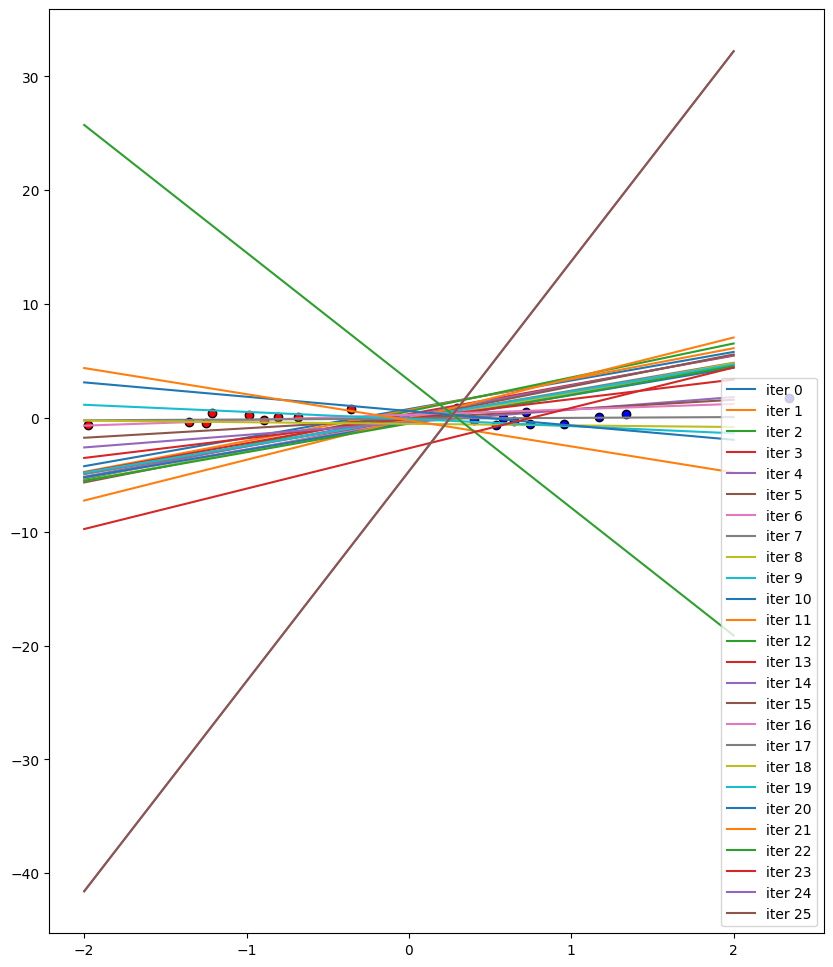

In [12]:
plt.figure(figsize=(10, 12))
plt.scatter(x0[:, 0], x0[:, 1], c='red', edgecolors='k')
plt.scatter(x1[:, 0], x1[:, 1], c='blue', edgecolors='k')
plt.x_lim = (-2, 2)
plt.y_lim = (-2, 2)
x = np.linspace(-2, 2, 100)
for iter, w in enumerate(perceptron_log.get()):
    y = -w[0]/w[2] - w[1]/w[2]*x
    plt.plot(x, y, label='iter {}'.format(iter))
# y = -w[0]/w[2] - w[1]/w[2]*x
# plt.plot(x, y)
plt.legend()
plt.show()